## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [61]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

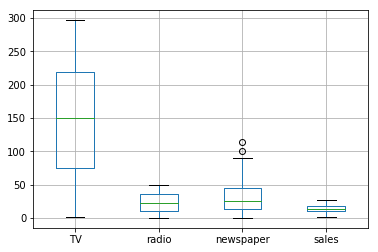

In [63]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

Text(0,0.5,'radio')

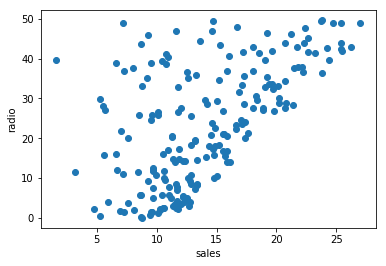

In [64]:
plt.scatter(df["sales"],df["radio"])
plt.xlabel("sales")
plt.ylabel("radio")

Text(0,0.5,'newspaper')

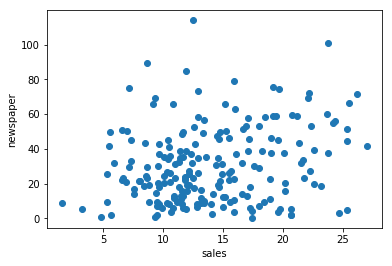

In [65]:
plt.scatter(df["sales"],df["newspaper"])
plt.xlabel("sales")
plt.ylabel("newspaper")

Text(0,0.5,'TV')

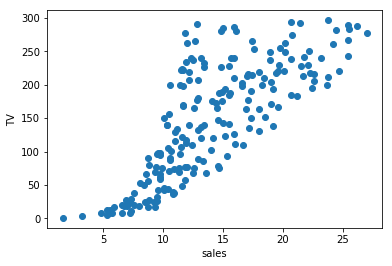

In [66]:
plt.scatter(df["sales"],df["TV"])
plt.xlabel("sales")
plt.ylabel("TV")

In [67]:
from pandas.tools.plotting import scatter_matrix 

C:\Users\LinDu\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FFE1CADA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025FFE5AF4E0>]], dtype=object)

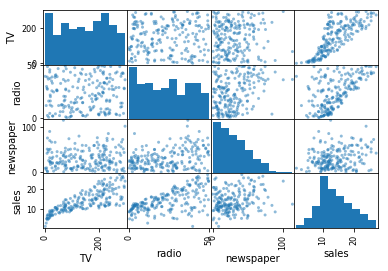

In [68]:
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer
Feature TV correlates with sales, but doesn't correlate with newspaper or radio. Feature radio correctes with sales and newspaper, but doesn't correlate with TV. Feature newspaper correlates with sales a little, but doesn't correlate with radio or TV. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [69]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [70]:
y = df["sales"]

b) Set X to be just the features described above in df

In [71]:
X = df.iloc[:,0:3]
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


c) Randomly split data into training and testing - 80% training, 20% testing.

In [72]:
size = len(df)
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

In [73]:
# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [74]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
model1 = regr.fit(X_train, y_train)
y_pred = model1.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [75]:
SSE = np.sum((regr.predict(X_test) - y_test) ** 2)
SST = np.sum((y_test - np.mean(y_test)) ** 2)
R_squared = 1-SSE/SST
R_squared
# It is very good, because it is 0.895, very closed to 1. This indicates that the regression line fits the data very well.

0.8954782879224388

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Text(0,0.5,'observations')

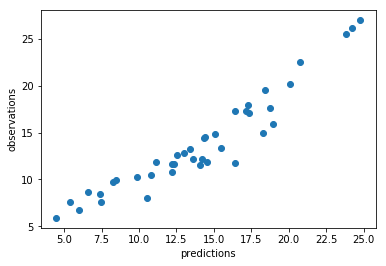

In [76]:

plt.scatter(y_pred, y_test)
plt.xlabel("predictions")
plt.ylabel("observations")

In [77]:
#The plot indicates the prediction of data and the observations are highly correlated. And the model is a good one.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [78]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]


In [83]:
# We should know that the coefficients represent associations, not causations

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [ ]:
# A "unit" increase in TV ad spending is associated with a 0.0472521 "unit" increase in Sales
# A "unit" increase in radio ad spending is associated with a 0.179922 "unit" increase in Sales
# A "unit" increase in newspaper ad spending is associated with a 0.047537 "unit" increase in Sales
# We should calculate the model Coefficients

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

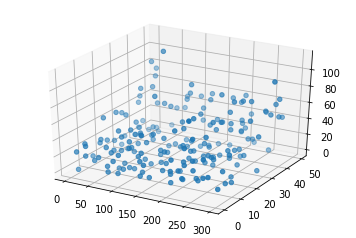

In [85]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.scatter3D(df["TV"], df["radio"], df["newspaper"], cmap='Greens');

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        #print(compute_error_for_line_given_points(b, m, points))
    return [b, m]

def run(points, learning_rate, num_iterations):
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


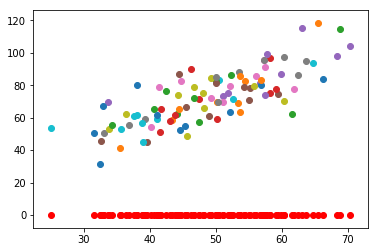

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


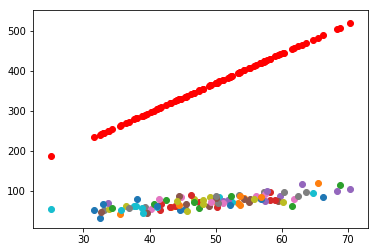

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


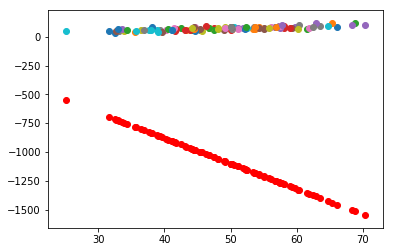

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


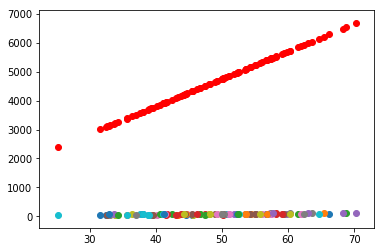

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


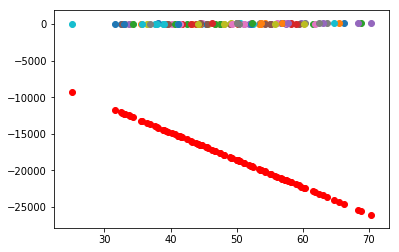

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


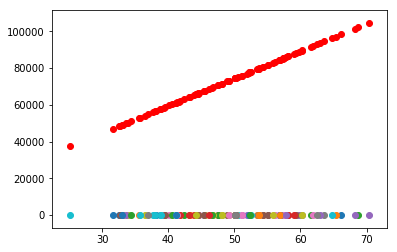

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


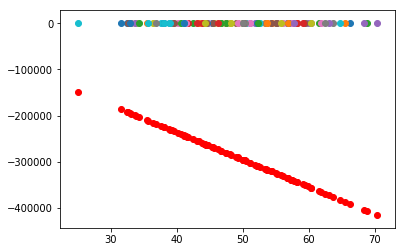

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


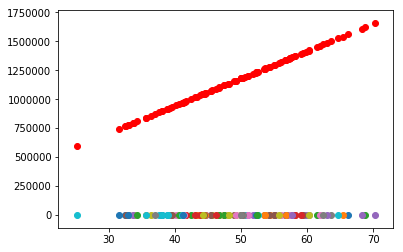

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


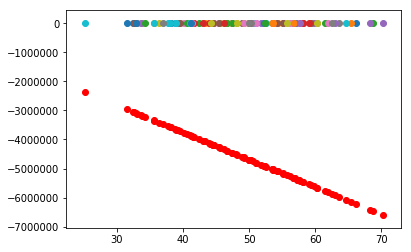

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


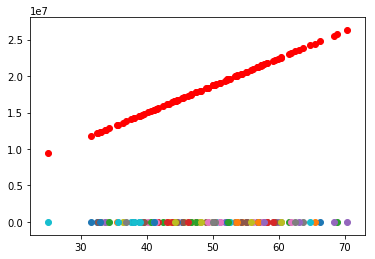

In [2]:
points = genfromtxt("../data/data.csv", delimiter=",")
learning_rate = 0.001
for num in range(0,10):
    run(points, learning_rate, num)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


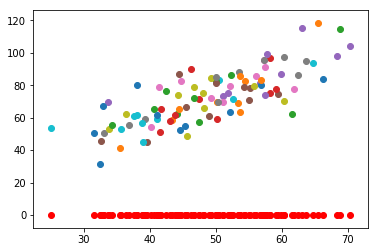

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


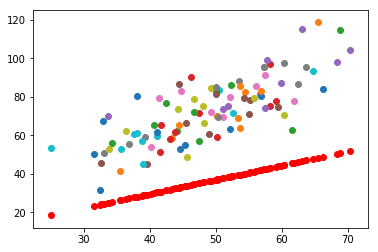

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


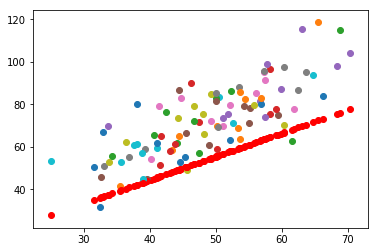

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


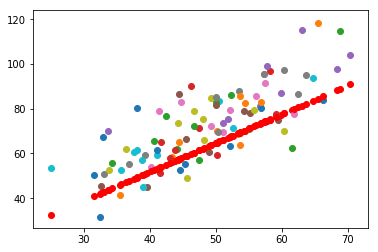

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


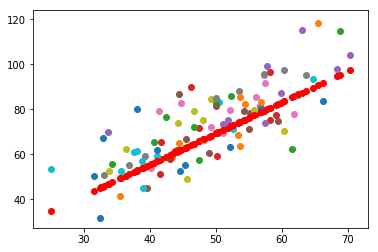

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


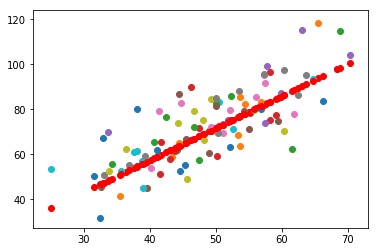

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


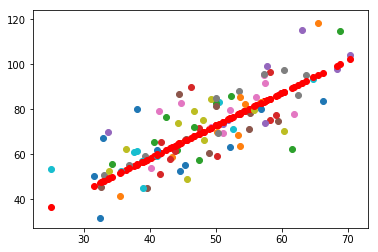

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


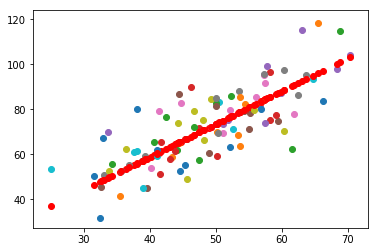

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


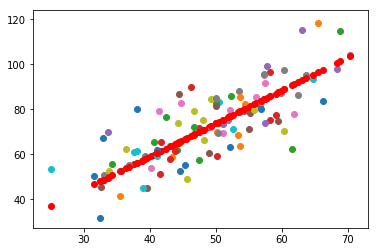

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


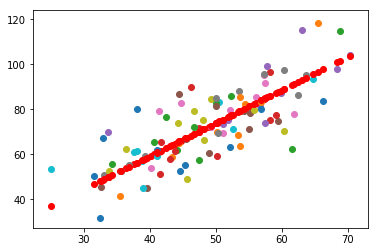

In [3]:
points = genfromtxt("../data/data.csv", delimiter=",")
learning_rate = 0.0001
for num in range(0,10):
    run(points, learning_rate, num)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


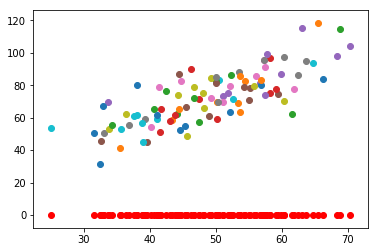

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


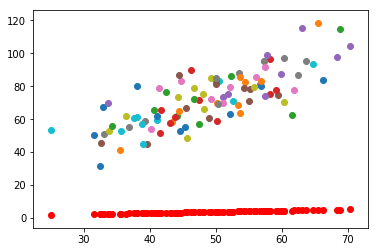

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


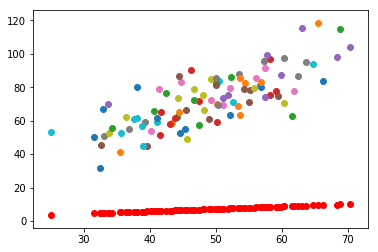

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


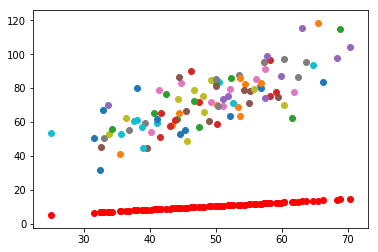

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


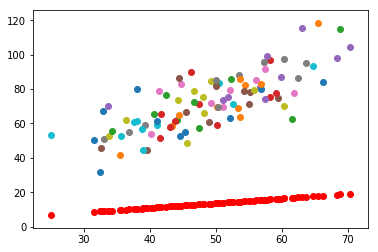

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


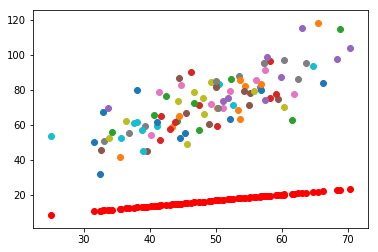

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


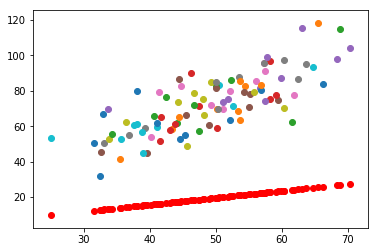

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


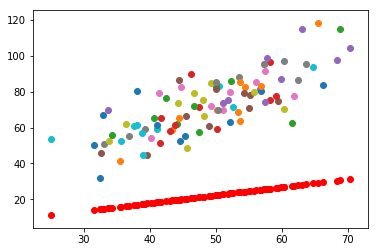

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


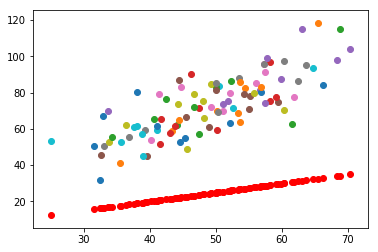

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


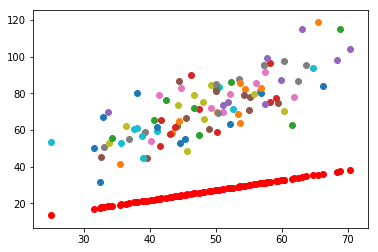

In [4]:
points = genfromtxt("../data/data.csv", delimiter=",")
learning_rate = 0.00001
for num in range(0,10):
    run(points, learning_rate, num)
    plt.show()

We can see that when learning rate is 0.0001 is good, because we can get the value; when learning rate is small, like less than 0.00001, the process of convergence is slow; when learning rate is large like 0.001, there is no convergence.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [5]:
dict_error_hist = {}
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
points = genfromtxt("../data/data.csv", delimiter=",")
num_iterations = 10000
for lr in [0.001, 2*0.001/3, 0.001/3, 0.0001, 2*0.0001/3, 0.0001/3, 0.00001]:
    print('learning rate: {}'.format(lr))
    b = initial_b
    m = initial_m
    list_errors = []
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), lr)
        list_errors.append(compute_error_for_line_given_points(b, m, points))
    dict_error_hist[lr] = array(list_errors)

learning rate: 0.001


C:\Users\LinDu\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\LinDu\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
C:\Users\LinDu\anaconda35.0.1\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


learning rate: 0.0006666666666666666
learning rate: 0.0003333333333333333
learning rate: 0.0001
learning rate: 6.666666666666667e-05
learning rate: 3.3333333333333335e-05
learning rate: 1e-05


In [6]:
import pandas as pd
df_error_hist = pd.DataFrame(dict_error_hist)
df_error_hist

,1e-05,3.33333333333e-05,6.66666666667e-05,0.0001,0.000333333333333,0.000666666666667,0.001
0,5035.166807,3903.973829,2543.800070,1484.586557,2496.978881,2.952487e+04,8.664880e+04
1,4556.732372,2748.917369,1196.655014,457.854258,1155.303570,1.587712e+05,1.373531e+06
2,4124.798445,1945.757948,595.988030,199.509986,568.596562,8.559655e+05,2.179768e+07
3,3734.845501,1387.287363,328.161760,134.505911,312.032875,4.616845e+06,3.459502e+08
4,3382.793278,998.959234,208.742985,118.149693,199.838975,2.490418e+07,5.490586e+09
5,3064.958089,728.938322,155.496357,114.034149,150.777156,1.343403e+08,8.714128e+10
6,2778.014276,541.181403,131.754660,112.998577,129.322635,7.246721e+08,1.383022e+12
7,2518.959411,410.626103,121.168665,112.737982,119.940629,3.909103e+09,2.195000e+13
8,2285.082883,319.845500,116.448553,112.672384,115.837863,2.108690e+10,3.483692e+14
9,2073.937530,256.721918,114.343930,112.655852,114.043679,1.137492e+11,5.528981e+15


0.000010    128
0.000033     40
0.000067     19
0.000100     11
0.000333     19
0.000667      0
0.001000      0
dtype: int64


C:\Users\LinDu\anaconda35.0.1\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


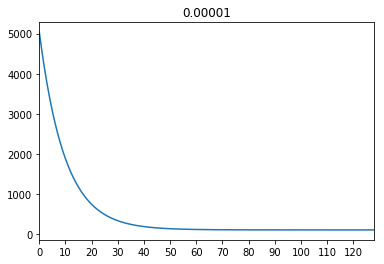

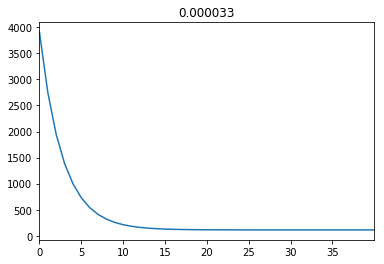

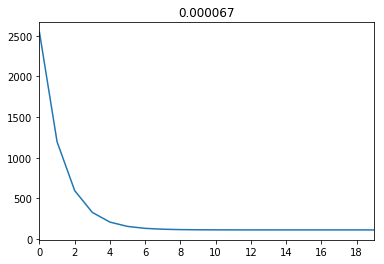

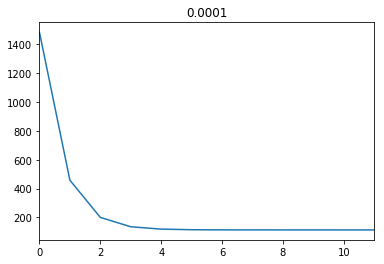

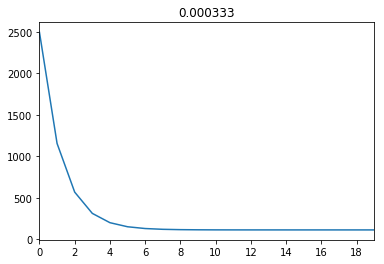

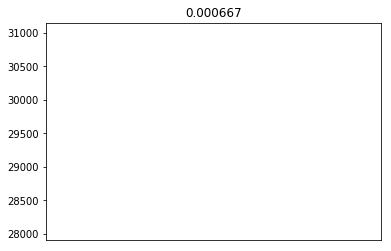

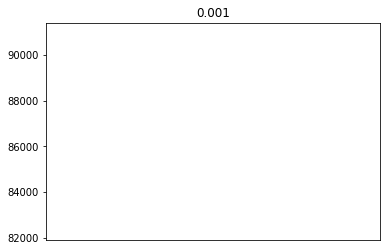

In [7]:
indices = ((df_error_hist.diff() / df_error_hist).abs() < 1e-5).idxmax()  # threshold is 1e-5
print(indices)
for k, v in indices.items():
    plt.figure()
    if v > 100:
        xticks = arange(0, v, 10)
    elif v < 20:
        xticks = arange(0, v, 2)
    else:
        xticks = arange(0, v, 5)
    df_error_hist.loc[:v, k].plot(xticks=xticks, title='{0:.6f}'.format(k).rstrip('0'))

We can see that when the threshold is 1e-5, we need the 128 iteration times with a learning rate equals to 0.00001, 40 iteration times with a learning rate equals to 0.000033, 19 iteration times with a learning rate equals to 0.000067, 11 iteration times with a learning rate equals to 0.0001, 19 iteration times with a learning rate equals to 0.000333, and we can not get the value with 0.000667 or 0.001.
Thus, when learning rate equals to 0.0001, we can get the value with the least time of iteration. 
